<a href="https://colab.research.google.com/github/shi-b-design/data_management_project/blob/main/loading__cleaning__processing_amazon_dataset_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
print("We loaded the amazon dataset.")
path = "/content/drive/MyDrive/Dataset/amazon.csv"
df = pd.read_csv(path)


We loaded the amazon dataset.


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Dataset/amazon.csv'

In [ ]:
#remove duplicates
df = df.drop_duplicates()

In [ ]:
#standardize col names
df.columns = [
    'product_id', 'product_name', 'category', 'discounted_price', 'actual_price',
    'discount_percentage', 'rating', 'rating_count', 'about_product', 'user_id',
    'user_name', 'review_id', 'review_title', 'review_content', 'img_link', 'product_link'
]


In [ ]:
#we can use strip to get rid of the Indian rupee sign and also the % sign.
df["discounted_price"] = df["discounted_price"].str.lstrip("₹")
df["actual_price"] = df["actual_price"].str.lstrip("₹")
df["discount_percentage"] = df["discount_percentage"].str.rstrip("%")

#also replace commas in discounted price and rating_count
df["discounted_price"] = df["discounted_price"].str.replace('[,]','', regex=True)
df["actual_price"] = df["actual_price"].str.replace('[,]','', regex=True)
df["rating_count"] = df["rating_count"].str.replace('[,]', '', regex=True)

#then we can also convert these to their proper numeric form
df["discounted_price"] = df["discounted_price"].astype(float)
df["actual_price"] = df["actual_price"].astype(float)
df["discount_percentage"] = df["discount_percentage"].astype(float)





In [ ]:
#we check for missing values
#missingValues = df.isnull().sum()
df.isnull().sum() #we can see that ther eare two null values in rating_count
# Display dataframe and missing value
#df.head(), missingValues

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [ ]:
#replace null/missing values with 0
df["rating_count"].fillna('0', inplace=True)
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [ ]:
from surprise import Dataset
from surprise import Reader

ModuleNotFoundError: No module named 'surprise'

In [ ]:
!pip install scikit-surprise

# install scikit and surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357252 sha256=c8df4bb540814b9505aee3ff8252c1678da32dd7a8477aa243688593dd992d21
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
from surprise import Dataset, Reader

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/amazon.csv"
df = pd.read_csv(path)

In [ ]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [ ]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
df.head(100)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,B093QCY6YJ,ZEBRONICS ZEB-USB150WF1 WiFi USB Mini Adapter ...,Computers&Accessories|NetworkingDevices|Networ...,₹290,₹349,17%,3.7,"1,977",Supports 150Mbps Wireless data transmission ra...,"AFOYOG3YKIOLPTLR3RZNRGUHHEAQ,AENFRNJLSQPJICHCP...","Mohseen Qureshi,Karan,Pranav Anand,Muthukumar,...","R32XZQTB1BP0J8,R2NHRHTL743ZMA,R10FKRAEORI9L,RE...","Good product,Best produced,Working well as of ...","Working very nice ok,Sahi paise ke hisab se sa...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/ZEBRONICS-ZEB-USB150WF1-...
96,B093ZNQZ2Y,LOHAYA Remote Compatible for Mi Smart LED TV 4...,"Electronics|HomeTheater,TV&Video|Accessories|R...",₹249,₹799,69%,3.8,"1,079",Compatible with MI Smart TV 4A 32 inch LED TV ...,"AGDR4WFX53YFXTBXAHC65MMBDERA,AFOEBFZC6LMNNTBEC...","mohamednathar,Amazon Customer,Ashwini Kansal,G...","R1MTTFP4GWHWC8,R2A03DS956BN4T,R21TRTA1VGGCD3,R...","Very hard to use,Good,Required Replacement but...","Not value for money.. not sati

In [ ]:

import scipy.stats
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
df.info()

In [ ]:
print(df['rating'].unique())


['4.2' '4.0' '3.9' '4.1' '4.3' '4.4' '4.5' '3.7' '3.3' '3.6' '3.4' '3.8'
 '3.5' '4.6' '3.2' '5.0' '4.7' '3.0' '2.8' '4' '3.1' '4.8' '2.3' '|' '2'
 '3' '2.6' '2.9']


In [ ]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Drop rows with NaN values in the 'rating' column
df = df.dropna(subset=['rating'])

# Convert 'rating' column to numeric type (if not already done)
df['rating'] = df['rating'].astype(float)

<ipython-input-9-429707f8c68a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'] = df['rating'].astype(float)


In [ ]:
#average_ratings = df.groupby('product_name')['rating'].mean().reset_index()
agg_ratings = df.groupby("product_name").agg(mean_rating = ("rating", "mean"), number_of_ratings = ("rating", "count")).reset_index()


In [ ]:
# Show the high rating items.
high_rated_products = agg_ratings[agg_ratings['mean_rating'] > 4.3]
high_rated_products.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210 entries, 0 to 1320
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_name       210 non-null    object 
 1   mean_rating        210 non-null    float64
 2   number_of_ratings  210 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 6.6+ KB


In [ ]:
# first list the product raiting over 4.3
high_rated_products.sort_values(by="number_of_ratings", ascending=False)

,product_name,mean_rating,number_of_ratings
654,MI Braided USB Type-C Cable for Charging Adapt...,4.4,3
324,Duracell USB C To Lightning Apple Certified (M...,4.4,3
325,Duracell USB Lightning Apple Certified (Mfi) B...,4.5,3
118,Amazonbasics Nylon Braided Usb-C To Lightning ...,4.4,3
1175,"WeCool S5 Long Selfie Stick, with Large Reinfo...",4.6,2
...,...,...,...
328,"Duracell Ultra Alkaline D Battery, 2 Pcs",4.4,1
329,Dyazo 6 Angles Adjustable Aluminum Ergonomic F...,4.4,1
334,ECOVACS DEEBOT N8 2-in-1 Robotic Vacuum Cleane...,4.4,1
336,ELV Aluminum Adjustable Mobile Phone Foldable ...,4.5,1


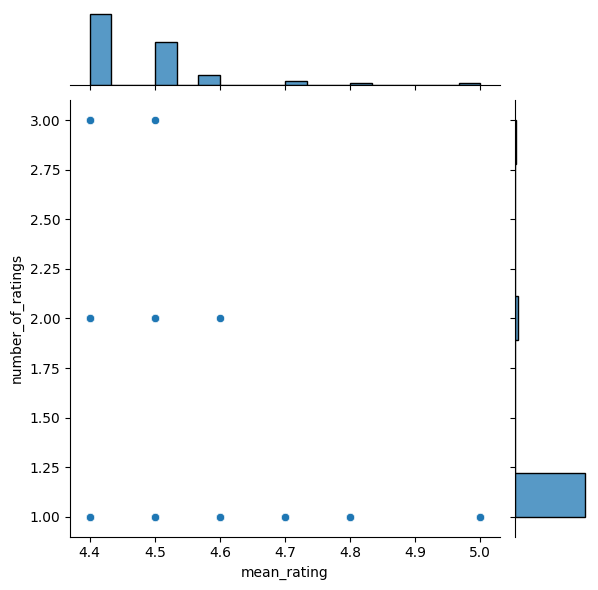

In [ ]:
sns.jointplot(x= "mean_rating", y = "number_of_ratings", data = high_rated_products)

In [ ]:
df_rate4 = pd.merge(df, high_rated_products[["product_name"]], on = "product_name", how = "inner")
df_rate4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           227 non-null    object 
 1   product_name         227 non-null    object 
 2   category             227 non-null    object 
 3   discounted_price     227 non-null    object 
 4   actual_price         227 non-null    object 
 5   discount_percentage  227 non-null    object 
 6   rating               227 non-null    float64
 7   rating_count         226 non-null    object 
 8   about_product        227 non-null    object 
 9   user_id              227 non-null    object 
 10  user_name            227 non-null    object 
 11  review_id            227 non-null    object 
 12  review_title         227 non-null    object 
 13  review_content       227 non-null    object 
 14  img_link             227 non-null    object 
 15  product_link         227 non-null    obj

In [ ]:
matrix = df_rate4.pivot_table(index = "product_name",columns = "user_id",values = "rating")
matrix.head()


user_id,"AE22Y3KIS7SE6LI3HE2VS6WWPU4Q,AHWEYO2IJ5I5GDWZAHJK6NGYHFMA,AGYURQ3476BNT4D2O46THXEUY3SA,AFPMBSBIEX45OQ6UCQWPDG55GWLQ,AGWJU3WUQBDQYPSYAJSR3AKBLCOA,AEOVUNFCIFV223O536GVW5JHZKOA","AE2JTMRKTUOIVIZWS2WDGTMNTU4Q,AF4QXCB32VC2DVE7O3DGFNQVFFNQ,AGAFYHMPFGVPR3MOS4QAZLAWPW3A,AGNNWLEF6V57TKIFJM7SWHNFAIQQ,AFVIPOPKMOCVCX3CMXUJHMWDIMGA,AH6MFUU725GG4KA3XTALSTU2ILHA,AGQYTSKE2UBYARZYRBADQMX6BJPQ,AG7F66F724JZ2HIJQY7NOU5M5D2Q","AE3GJ4N2G2K4Q6JXYPIQSH4344CQ,AFJMCZWWZZF4HZYT5QLSXG4AKOTQ,AGGORGEJT3XXWXUJNZJNW2L6UZAQ,AENODPH3RWTEZMADDI7ZXXD5UBLQ,AEJQ7NWZITDPI44AMIPQPK7DQLCQ,AGJRVDXBXRIIRR3G7HCF5CR6XDSA,AGU4IMQTKDZTL6IFTDNG3D5CQO6A,AGKXGJ5QRZFNVZ3MKY7PHAOMT5LA","AE42ODBABKBHKRL2PW5XSBEB2IWQ,AFZVZZKBT4ICJLQIMTJ2ZK44UMIQ,AHZDTJJ7PM3GN33LCJB2YWN4QCZA,AEZ25F4GGF4YOFE6XLJ2SN6TNRGQ,AECUHYUPESWI2DB5JMEZQF77VWOA,AEJJNCWMRDOBBFSPLRZQ6BPGI3OA,AFK3PX2HPROWVOD27NFYCUDWKRGQ,AG67OUXW2WVTJESMZA7F2RPZXWGQ","AE4DPKX5AMUCEWM4543JPWAZVA2A,AH2F6TKL4URXVF2VLVALIU3LA37A,AH4TRU2DCGNKR6IR7W2RIZ5VGILQ,AH7JD2XKCXB32VIEPM4ZMZPFOWGQ,AGUN5Y5M3I3FV5N22KYZUKPU46GA,AGUFGA3PLAEHPSQFXRBSE6LUTOIQ,AH3E36EPFQ2YJEZWSCIN3TQKYWLQ,AFXQA7YBNBU7CB6QVQ7MYYUDP3LA","AE57EASYAUGIY3LHBP7QIOETS7IA,AEIGU5AK2I65SNMDBAHWSHIONC6Q,AFT7I5VC6EBJ6RQRYTGRLAG3HXUQ,AFFBQAX7B4JEDSFQO5YV2N53DZQA,AEIBNPVAOVFKRMNCG7WQBP3KD6LA,AGTIJUTFLQK2XPPQ6CYRFIRIFB7A,AGYJCHWOAP3BOVRZTI4X2BDJVMVA,AG6FIMS4K4KZ2ZEJMESRMWXFYFXQ","AE6QIRYYQXWBXRANCBNV7UQU3C3Q,AFR73WEZI4S76UC6WTRTOM27ENZQ,AFCBKJAWH4J2UWEUQEGSVYNFT2YA,AFDKMC6DZFM4M7BKRFA4APKCYZHQ,AECLFSQIEBC26S2ZU7FRYDI66W2A,AFTZLBOMSZSCBJ7CK5VXRSA6FGMQ,AH3HKWLRRJWVLWWNSNRI67WU77ZQ,AHMPP4TKEPMV7DE5QB5NSFTTXUPQ","AE6TTPY5R4YW3XHTPGX6CGHLMVGA,AG5CBSM4UJ7KPPFIQGZPIXASGR2Q,AHM4EBIS4ZE6DWJJBGCJ7OPTBA4Q,AE5M5KSBCHDULWFU2S2YB7JAWQDQ,AGMVFFHVHR6DRCMJOOLWQCN5ZXIQ,AECKGXUASU4IXEIMUNT2ZGT47JPQ,AHJVTASYJSVOZ7XSEMDCWOK3X44Q,AGWG3P5XN6X6JHXKXXOK67JWZRXA","AE7D3RJLZB7FRIEHCAY6O2ATRJDQ,AGR6MSMT6NDHTYUYWIF25PIVEEQQ,AGDGOIKF2V3IFHQLZ7QSCAYQTRNQ,AHQ6LZRLPWZRHXDESLTHYTIQPKVA,AHNLTNUGEDFJQZDRMZTHFFEV6YHA,AE4ENCSAVBVYJVFC3GMNMRDSD2KA,AEBRFXFON7LZTJCLJHVYUTGAG4JA,AEA7RJWIWRHGUYKUP6LJBPRSZCDA","AE7M7M6QTDYEHQKAKXIWO2OVMBXQ,AESSDAJQCU3XKBAGYDYVBCKLOTSQ,AF3DTQ5WLDISMZLEORWHXTLHV3NQ,AHF2BSEZURS7UKI23YIHED3UIJKQ,AFZKPE6ZA4U5QVICSDRTTYN7PJEQ,AECBX5NSUD2POXPYXHZSETUVH5CA,AGRBDMHDBF2KXPBPF4S5PAVY3NYQ,AG6Z3AUD67XGSSTZOR6GZX3IC3DA",...,"AHUR3WRNQOQ44GWIBTXRYLF6UTAA,AHW46KPBJ44BLDZYQTJH7QTN6FSQ,AEMR6MDZJREXTMBCB47HWPCXCW6Q,AHHLBBLNGWZWIX23N4AQKFS6XXAA,AFOBDH2OA23THZ46QVAYYN7IGF6Q,AHAGHWROWNW4HLHX42ZR5R6KWG5Q,AE3TDTXNYRURNBEATXHSUB52QUQA,AH6TJ2BWPQEIN7ZGCY7AC34W7EZA","AHVAI77H64YMRRMLITKJ5FPYALPQ,AGRSF3JCWR3L4M2GULFI4A4KCZKA,AGBRAMADVM5J4BNY7O4WWXMTYEBA,AHX5AFYII54YJY4XSBZU3HV2PN2A,AFTD5SG4EQFZYMU5MFGH4URN6PKQ,AEESPVBBOGON4LQB5OV3CCXNRKJQ,AG4FDTJABUWBNHOQZ6CDMPEV5VFA,AE637NV55PORSWGNKW547AAOV3VA","AHVPFHNEPCJFLAXKD5IGQRRBHMWA,AE7N4FEGNJFTRCFIDRMGOBDVTOKA,AF6FIGYER3CY6DBUHEUCV7C6WNMQ,AF7IXQKBUL6NEIQG4R53LMJJUGXQ,AFKAKXB7ROJUPGDQFMMREJPHKRGQ,AFZEG6L4GPWPLCNRA727ERKMBPBA,AFJZ3VZZ6FQUGCAV2NYXFS44TAMA,AGQ33PJLVCO67H7X7FFQPI3WIXWQ","AHWC76VEMF5NNLUBQCANCBHLBRNQ,AEYYU3KIHUOI2TXTTMFGIGSO7Q6A,AGHDAMFVW6VIKXBXTJQO532AMIDQ,AEMWRPIH6QNSF63L73AYAG4BO74Q,AHF7VQLRU5JXP6RK73TKZND6LRXQ,AE4CY6H2MUWSFJ66OVTV6RBJCC3Q,AEZ3L5FPOTNXXQQKXUFH4PMJMXSA,AE7R6PIVOLTXM6HWGKPKBI7NBIVQ","AHX5COLYUD4DO3WUMFCOQ47NPJFQ,AFZZF7APWEI5WIVALP3CW2M224VQ,AEDMCNDDE56FCVUPTKNCDFKM26NA,AFIHBS3KY7XZ2DGYYEIQ66UHBX4Q,AH7ZATBNY5PTPNUPHFBVKZGW646Q,AG6IV4AS3MF5FG3VYPZOG3ACGNLA,AEAYAWNX73JL6XLLTZIBP3WRPGXA,AG6BE54C5GMY47O4FSBWFNFTOGLA","AHXO56F7SD2DIP32TF2DYFXQRYLA,AF2JRVSNIBOLEQ7JJAMEDYI6KFNA,AG2KZIEWJBPZO4LANZZXK7YITI7Q,AE6HZIWCKGIK6A5E2O3FKGEOXWMQ,AF3K2H5T4WJA34CWHVX5GP7UR5BA,AF5B57TLTYLJQ2ZKIKWG7Z3X33UA,AHQRQ7SYZACJCC7C24RA7UIAJQDA,AHAJEE66NTLWNOEFHFRCXAEWBCIA","AHXQPNDQMOD2RJE2S6KG3CM6QRXA,AHEDAEYXIZIPVLI6HSDRKIGYILCA,AHNDQGC5II2W2NNJDKODYCGFN77A,AFEOPOMJ6P77R4KX2YKC4UXVHCMQ,AEGFHIVVOOMWQ2JRIPHMTSZ2VIYA,AEBIN6NSCXXL32OUISQKEN575X2A,AEAUDCMXHJHTKQNGANQYEVTM5ZYA,AFPWUFA4L6HJ5LJTBDR4J3MKJ4XA","AHYXOMUJUKZHBWHP43ZAB265EDGA,AG4C27NTZZ7HTG6W3ADZYHAUEZCA,AFYACVFEH

In [ ]:
# Normalize user-item matrix
matrix_norm = matrix.subtract(matrix.mean(axis = 1), axis = 0)
matrix_norm.head()


user_id,"AE22Y3KIS7SE6LI3HE2VS6WWPU4Q,AHWEYO2IJ5I5GDWZAHJK6NGYHFMA,AGYURQ3476BNT4D2O46THXEUY3SA,AFPMBSBIEX45OQ6UCQWPDG55GWLQ,AGWJU3WUQBDQYPSYAJSR3AKBLCOA,AEOVUNFCIFV223O536GVW5JHZKOA","AE2JTMRKTUOIVIZWS2WDGTMNTU4Q,AF4QXCB32VC2DVE7O3DGFNQVFFNQ,AGAFYHMPFGVPR3MOS4QAZLAWPW3A,AGNNWLEF6V57TKIFJM7SWHNFAIQQ,AFVIPOPKMOCVCX3CMXUJHMWDIMGA,AH6MFUU725GG4KA3XTALSTU2ILHA,AGQYTSKE2UBYARZYRBADQMX6BJPQ,AG7F66F724JZ2HIJQY7NOU5M5D2Q","AE3GJ4N2G2K4Q6JXYPIQSH4344CQ,AFJMCZWWZZF4HZYT5QLSXG4AKOTQ,AGGORGEJT3XXWXUJNZJNW2L6UZAQ,AENODPH3RWTEZMADDI7ZXXD5UBLQ,AEJQ7NWZITDPI44AMIPQPK7DQLCQ,AGJRVDXBXRIIRR3G7HCF5CR6XDSA,AGU4IMQTKDZTL6IFTDNG3D5CQO6A,AGKXGJ5QRZFNVZ3MKY7PHAOMT5LA","AE42ODBABKBHKRL2PW5XSBEB2IWQ,AFZVZZKBT4ICJLQIMTJ2ZK44UMIQ,AHZDTJJ7PM3GN33LCJB2YWN4QCZA,AEZ25F4GGF4YOFE6XLJ2SN6TNRGQ,AECUHYUPESWI2DB5JMEZQF77VWOA,AEJJNCWMRDOBBFSPLRZQ6BPGI3OA,AFK3PX2HPROWVOD27NFYCUDWKRGQ,AG67OUXW2WVTJESMZA7F2RPZXWGQ","AE4DPKX5AMUCEWM4543JPWAZVA2A,AH2F6TKL4URXVF2VLVALIU3LA37A,AH4TRU2DCGNKR6IR7W2RIZ5VGILQ,AH7JD2XKCXB32VIEPM4ZMZPFOWGQ,AGUN5Y5M3I3FV5N22KYZUKPU46GA,AGUFGA3PLAEHPSQFXRBSE6LUTOIQ,AH3E36EPFQ2YJEZWSCIN3TQKYWLQ,AFXQA7YBNBU7CB6QVQ7MYYUDP3LA","AE57EASYAUGIY3LHBP7QIOETS7IA,AEIGU5AK2I65SNMDBAHWSHIONC6Q,AFT7I5VC6EBJ6RQRYTGRLAG3HXUQ,AFFBQAX7B4JEDSFQO5YV2N53DZQA,AEIBNPVAOVFKRMNCG7WQBP3KD6LA,AGTIJUTFLQK2XPPQ6CYRFIRIFB7A,AGYJCHWOAP3BOVRZTI4X2BDJVMVA,AG6FIMS4K4KZ2ZEJMESRMWXFYFXQ","AE6QIRYYQXWBXRANCBNV7UQU3C3Q,AFR73WEZI4S76UC6WTRTOM27ENZQ,AFCBKJAWH4J2UWEUQEGSVYNFT2YA,AFDKMC6DZFM4M7BKRFA4APKCYZHQ,AECLFSQIEBC26S2ZU7FRYDI66W2A,AFTZLBOMSZSCBJ7CK5VXRSA6FGMQ,AH3HKWLRRJWVLWWNSNRI67WU77ZQ,AHMPP4TKEPMV7DE5QB5NSFTTXUPQ","AE6TTPY5R4YW3XHTPGX6CGHLMVGA,AG5CBSM4UJ7KPPFIQGZPIXASGR2Q,AHM4EBIS4ZE6DWJJBGCJ7OPTBA4Q,AE5M5KSBCHDULWFU2S2YB7JAWQDQ,AGMVFFHVHR6DRCMJOOLWQCN5ZXIQ,AECKGXUASU4IXEIMUNT2ZGT47JPQ,AHJVTASYJSVOZ7XSEMDCWOK3X44Q,AGWG3P5XN6X6JHXKXXOK67JWZRXA","AE7D3RJLZB7FRIEHCAY6O2ATRJDQ,AGR6MSMT6NDHTYUYWIF25PIVEEQQ,AGDGOIKF2V3IFHQLZ7QSCAYQTRNQ,AHQ6LZRLPWZRHXDESLTHYTIQPKVA,AHNLTNUGEDFJQZDRMZTHFFEV6YHA,AE4ENCSAVBVYJVFC3GMNMRDSD2KA,AEBRFXFON7LZTJCLJHVYUTGAG4JA,AEA7RJWIWRHGUYKUP6LJBPRSZCDA","AE7M7M6QTDYEHQKAKXIWO2OVMBXQ,AESSDAJQCU3XKBAGYDYVBCKLOTSQ,AF3DTQ5WLDISMZLEORWHXTLHV3NQ,AHF2BSEZURS7UKI23YIHED3UIJKQ,AFZKPE6ZA4U5QVICSDRTTYN7PJEQ,AECBX5NSUD2POXPYXHZSETUVH5CA,AGRBDMHDBF2KXPBPF4S5PAVY3NYQ,AG6Z3AUD67XGSSTZOR6GZX3IC3DA",...,"AHUR3WRNQOQ44GWIBTXRYLF6UTAA,AHW46KPBJ44BLDZYQTJH7QTN6FSQ,AEMR6MDZJREXTMBCB47HWPCXCW6Q,AHHLBBLNGWZWIX23N4AQKFS6XXAA,AFOBDH2OA23THZ46QVAYYN7IGF6Q,AHAGHWROWNW4HLHX42ZR5R6KWG5Q,AE3TDTXNYRURNBEATXHSUB52QUQA,AH6TJ2BWPQEIN7ZGCY7AC34W7EZA","AHVAI77H64YMRRMLITKJ5FPYALPQ,AGRSF3JCWR3L4M2GULFI4A4KCZKA,AGBRAMADVM5J4BNY7O4WWXMTYEBA,AHX5AFYII54YJY4XSBZU3HV2PN2A,AFTD5SG4EQFZYMU5MFGH4URN6PKQ,AEESPVBBOGON4LQB5OV3CCXNRKJQ,AG4FDTJABUWBNHOQZ6CDMPEV5VFA,AE637NV55PORSWGNKW547AAOV3VA","AHVPFHNEPCJFLAXKD5IGQRRBHMWA,AE7N4FEGNJFTRCFIDRMGOBDVTOKA,AF6FIGYER3CY6DBUHEUCV7C6WNMQ,AF7IXQKBUL6NEIQG4R53LMJJUGXQ,AFKAKXB7ROJUPGDQFMMREJPHKRGQ,AFZEG6L4GPWPLCNRA727ERKMBPBA,AFJZ3VZZ6FQUGCAV2NYXFS44TAMA,AGQ33PJLVCO67H7X7FFQPI3WIXWQ","AHWC76VEMF5NNLUBQCANCBHLBRNQ,AEYYU3KIHUOI2TXTTMFGIGSO7Q6A,AGHDAMFVW6VIKXBXTJQO532AMIDQ,AEMWRPIH6QNSF63L73AYAG4BO74Q,AHF7VQLRU5JXP6RK73TKZND6LRXQ,AE4CY6H2MUWSFJ66OVTV6RBJCC3Q,AEZ3L5FPOTNXXQQKXUFH4PMJMXSA,AE7R6PIVOLTXM6HWGKPKBI7NBIVQ","AHX5COLYUD4DO3WUMFCOQ47NPJFQ,AFZZF7APWEI5WIVALP3CW2M224VQ,AEDMCNDDE56FCVUPTKNCDFKM26NA,AFIHBS3KY7XZ2DGYYEIQ66UHBX4Q,AH7ZATBNY5PTPNUPHFBVKZGW646Q,AG6IV4AS3MF5FG3VYPZOG3ACGNLA,AEAYAWNX73JL6XLLTZIBP3WRPGXA,AG6BE54C5GMY47O4FSBWFNFTOGLA","AHXO56F7SD2DIP32TF2DYFXQRYLA,AF2JRVSNIBOLEQ7JJAMEDYI6KFNA,AG2KZIEWJBPZO4LANZZXK7YITI7Q,AE6HZIWCKGIK6A5E2O3FKGEOXWMQ,AF3K2H5T4WJA34CWHVX5GP7UR5BA,AF5B57TLTYLJQ2ZKIKWG7Z3X33UA,AHQRQ7SYZACJCC7C24RA7UIAJQDA,AHAJEE66NTLWNOEFHFRCXAEWBCIA","AHXQPNDQMOD2RJE2S6KG3CM6QRXA,AHEDAEYXIZIPVLI6HSDRKIGYILCA,AHNDQGC5II2W2NNJDKODYCGFN77A,AFEOPOMJ6P77R4KX2YKC4UXVHCMQ,AEGFHIVVOOMWQ2JRIPHMTSZ2VIYA,AEBIN6NSCXXL32OUISQKEN575X2A,AEAUDCMXHJHTKQNGANQYEVTM5ZYA,AFPWUFA4L6HJ5LJTBDR4J3MKJ4XA","AHYXOMUJUKZHBWHP43ZAB265EDGA,AG4C27NTZZ7HTG6W3ADZYHAUEZCA,AFYACVFEH

In [ ]:
# user similarity matrix using Person correlation
user_similarity = matrix_norm.T.corr()
user_similarity.head()

product_name,!!1000 Watt/2000-Watt Room Heater!! Fan Heater!!Pure White!!HN-2500!!Made in India!!,"10k 8k 4k HDMI Cable, Certified 48Gbps 1ms Ultra High Speed HDMI 2.1 Cable 4k 120Hz 144Hz 2k 165Hz 8k 60Hz Dynamic HDR ARC eARC DTS:X Compatible for Mac Gaming PC Soundbar TV Monitor Laptop PS5 4 Xbox","3M Post-it Sticky Note Cube, 200 Sheets (4 Colors x 50 Sheets) | 3"" x 3"" Size | For notes, reminders, study, school and organizing",AGARO Imperial 240-Watt Slow Juicer with Cold Press Technology,"AirCase Protective Laptop Bag Sleeve fits Upto 13.3"" Laptop/ MacBook, Wrinkle Free, Padded, Waterproof Light Neoprene case Cover Pouch, for Men & Women, Black- 6 Months Warranty","AirCase Rugged Hard Drive Case for 2.5-inch Western Digital, Seagate, Toshiba, Portable Storage Shell for Gadget Hard Disk USB Cable Power Bank Mobile Charger Earphone, Waterproof (Black)","Amazon Basics 10.2 Gbps High-Speed 4K HDMI Cable with Braided Cord, 1.8 Meter, Dark Grey",Amazon Basics 16-Gauge Speaker Wire - 50 Feet,Amazon Basics 2 Amp USB Wall Charger & Micro USB Cable (White),"Amazon Basics HDMI Coupler,Black",...,"Western Digital WD 2TB My Passport Portable Hard Disk Drive, USB 3.0 with Automatic Backup, 256 Bit AES Hardware Encryption,Password Protection,Compatible with Windows and Mac, External HDD-Black",Western Digital WD Green SATA 240GB Internal SSD Solid State Drive - SATA 6Gb/s 2.5 inches - WDS240G3G0A,"Xiaomi Pad 5| Qualcomm Snapdragon 860| 120Hz Refresh Rate| 6GB, 128GB| 2.5K+ Display (10.95-inch/27.81cm)|1 Billion Colours| Dolby Vision Atmos| Quad Speakers| Wi-Fi| Gray","ZEBRONICS Aluminium Alloy Laptop Stand, Compatible with 9-15.6 inch Laptops, 7 Angles Adjustable, Anti Slip Silicon Rubber Pads, Foldable, Velvet Pouch Inside, Zeb-NS2000 (Dark Grey)",Zebronics Zeb-Transformer-M Optical USB Gaming Mouse with LED Effect(Black),"Zuvexa Egg Boiler Poacher Automatic Off Steaming, Cooking, Boiling Double Layer 14 Egg Boiler (Multicolor)…","Zuvexa USB Rechargeable Electric Foam Maker - Handheld Milk Wand Mixer Frother for Hot Milk, Hand Blender Coffee, Egg Beater (Black)","boAt A 350 Type C Cable for Smartphone, Charging Adapter (1.5m, Carbon Black)","iQOO Neo 6 5G (Dark Nova, 8GB RAM, 128GB Storage) | Snapdragon® 870 5G | 80W FlashCharge","oraimo 65W Type C to C Fast Charging Cable USB C to USB C Cable High Speed Syncing, Nylon Braided 1M length with LED Indicator Compatible For Laptop, Macbook, Samsung Galaxy S22 S20 S10 S20Fe S21 S21 Ultra A70 A51 A71 A50S M31 M51 M31S M53 5G"
product_name,,,,,,,,,,,,,,,,,,,,,
!!1000 Watt/2000-Watt Room Heater!! Fan Heater!!Pure White!!HN-2500!!Made in India!!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"10k 8k 4k HDMI Cable, Certified 48Gbps 1ms Ultra High Speed HDMI 2.1 Cable 4k 120Hz 144Hz 2k 165Hz 8k 60Hz Dynamic HDR ARC eARC DTS:X Compatible for Mac Gaming PC Soundbar TV Monitor Laptop PS5 4 Xbox",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"3M Post-it Sticky Note Cube, 200 Sheets (4 Colors x 50 Sheets) | 3"" x 3"" Size | For notes, reminders, study, school and organizing",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGARO Imperial 240-Watt Slow Juicer with Cold Press Technology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"AirCase Protective Laptop Bag Sleeve fits Upto 13.3"" Laptop/ MacBook, Wrinkle Free, Padded, Waterproof Light Neoprene case Cover Pouch, for Men & Women, Black- 6 Months Warranty",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

In [ ]:
# Collaborative Filtering
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['user_id', 'product_name', 'rating']], reader)


In [ ]:
trainset, testset = train_test_split(data, test_size=0.2)

In [ ]:
algo = SVD()
algo.fit(trainset)


In [ ]:
# Calculate predictions for the test set
predictions = algo.test(testset)

# Calculate accuracy
accuracy.rmse(predictions)

RMSE: 0.2829


0.28287476049512644

In [ ]:
for uid, iid, true_r, est, _ in predictions[:10]:  # Showing the first 10 predictions
    print(f'User {uid} rated item {iid} with actual rating {true_r} and predicted rating {est:.2f}')

User AHZJHJWFZLYD64GVP4PXVI2F4LXA,AEUCRZPOISXKHXMCZUH6BXTUXUWA,AFL2ICS3EEESPGYLFF7OTVYMLVJA,AG63J3CFIT6RYX32RHHYWRZ2WKKA,AE6EGCFBVJIZEZ4XPPIY3PES2SDQ,AHUZG5YJCM4UWL66ALQ744FD3OOA,AEIKB2XA64MPG7BBXRG4DT57QKPQ,AF4ECPZRARF7SK2GDSBPTINVA2CA rated item Aquadpure Copper + Mineral RO+UV+UF 10 to 12 Liter RO + UV + TDS ADJUSTER Water Purifier with Copper Charge Technology black & copper Best For Home and Office (Made In India) with actual rating 4.6 and predicted rating 4.10
User AF7KVNWBD7JWYLKGKXBYJ5O7RQ4Q,AENT4PFAUWIXBLC63RBXFSIQS25A,AFNJ2FA2TZWNELD25ME5HKAFNN3A,AE7HD2B333CUTVNEKKQ2OFF3ZWNA,AH7QP5VH5777BLVSP5M6KE2IEOWA,AFHOIELXNNNUIH657DZGY66E47BA,AG56GJXG2U4TIZ42J4H5SIAOZFSQ,AEE5ETMIZN42YFYSNE3DUQUSWEJA rated item Artis AR-45W-MG2 45 Watts MG2 Laptop Adapter/Charger Compatible with MB Air 13” & MB Air 11” (14.5 V, 3.1 A) Connector: MG2 (T Tip Connector) with actual rating 3.6 and predicted rating 4.10
User AG7C6DAADCTRQJG2BRS3RIKDT52Q,AFU7BOMPVJ7Q3TTA4G67RASTGYIQ,AER5ZGIXXVYG3AWZTRZT7M2BYC

In [ ]:
# Content- Based filtering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['about_product'])

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)


In [ ]:
# The function to make recommendation based on the items you get.

def get_recommendations(product_id, cosine_sim=cosine_sim):
    idx = df.index[df['product_id'] == product_id].tolist()[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    item_indices = [i[0] for i in sim_scores]
    return df['product_id'].iloc[item_indices]


In [ ]:
# listing recommendations from product_id
recommended_items = get_recommendations('B093ZNQZ2Y')
print(recommended_items)

279    B08TZD7FQN
179    B08XMSKKMM
250    B09B125CFJ
142    B08RX8G496
275    B09LV13JFB
102    B07DL1KC3H
211    B08RHPDNVV
225    B09H39KTTB
138    B071VMP1Z4
180    B09L8DT7D6
Name: product_id, dtype: object


In [ ]:
def hybrid_recommendation(user_id, product_id):
  # collaborative filtering
  cf_prediction = algo.predict(user_id, product_id).est

    # Content-based filtering similarity
  idx = df.index[df['product_id'] == product_id].tolist()[0]
  sim_scores = list(enumerate(cosine_sim[idx]))
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
  cb_prediction = np.mean([x[1] for x in sim_scores[1:11]])

    # Combine the predictions (simple average here)
  hybrid_score = (cf_prediction + cb_prediction) / 2
  return hybrid_score


  user_id = "AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONILA,AHCTC6ULH4XB6YHDY6PCH2R772LQ,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,AENGU523SXMOS7JPDTW52PNNVWGQ,AEQJHCVTNINBS4FKTBGQRQTGTE5Q,AFC3FFC5PKFF5PMA52S3VCHOZ5FQ"
  product_id = 'B07JW9H4J1'
  score = hybrid_recommendation(user_id, product_id)
  print(f'Hybrid score for user {user_id} and item {product_id}: {score}')

In [ ]:

from sklearn.metrics import precision_score, recall_score, f1_score

# Predict ratings for the test set
predictions = algo.test(testset)

# Convert predictions to binary recommendations
threshold = 4.0  # Define a threshold for considering recommendations
y_true = [1 if true_r >= threshold else 0 for (_, _, true_r, _, _) in predictions]
y_pred = [1 if est >= threshold else 0 for (_, _, _, est, _) in predictions]

# Calculate precision, recall, and F1-score
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

Precision: 0.78
Recall: 1.00
F1-score: 0.87


In [ ]:
!

In [ ]:
!pip install flask pandas numpy scikit-learn

In [ ]:
!wget -q -O ngrok.zip https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip -o ngrok.zip
!chmod +x ngrok

Archive:  ngrok.zip
  inflating: ngrok                   


In [ ]:
from google.colab.output import eval_js
print(eval_js("google.colab.kernel.proxyPort(5000)"))

In [ ]:
from flask import Flask, request, jsonify
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import linear_kernel
import subprocess
import json
import time

# Initialize Flask app
app = Flask(__name__)

# Load your data and cosine similarity matrix
df = pd.read_csv("/content/drive/MyDrive/amazon.csv")
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

def get_recommendations(product_id, cosine_sim=cosine_sim):
    idx = df.index[df['product_id'] == product_id].tolist()[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    item_indices = [i[0] for i in sim_scores]
    return df['product_id'].iloc[item_indices].tolist()

@app.route('/recommend', methods=['GET'])
def recommend():
    product_id = request.args.get('product_id')
    if not product_id:
        return jsonify({'error': 'Product ID is required'}), 400
    try:
        recommendations = get_recommendations(product_id)
        return jsonify({'recommendations': recommendations})
    except Exception as e:
        return jsonify({'error': str(e)}), 500

def start_ngrok():
    subprocess.Popen(['./ngrok', 'http', '5000'])
    time.sleep(5)  # Give ngrok time to establish the connection
    # Get the public URL from ngrok
    ngrok_url = subprocess.check_output(['curl', '-s', 'http://localhost:4040/api/tunnels']).decode('utf-8')
    ngrok_url = json.loads(ngrok_url)['tunnels'][0]['public_url']
    print(f"Ngrok Tunnel URL: {ngrok_url}")

if __name__ == '__main__':
    start_ngrok()
    app.run(port=5000)

CalledProcessError: Command '['curl', '-s', 'http://localhost:4040/api/tunnels']' returned non-zero exit status 7.

In [ ]:
import subprocess
import time

# Start Flask app
process = subprocess.Popen(['python', '-m', 'flask', 'run', '--host=0.0.0.0', '--port=5000'])

# Give Flask a few seconds to start
time.sleep(5)

# Start Ngrok tunnel
public_url = subprocess.check_output(['./ngrok', 'http', '5000']).decode('utf-8')
print("Ngrok Tunnel URL:", public_url)

CalledProcessError: Command '['./ngrok', 'http', '5000']' returned non-zero exit status 1.